# Anomaly Detection- Isolation forest 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [2]:
X, _ = make_blobs(n_samples=300, centers=[[2, 2], [-2, -2], [2, -2]], cluster_std=0.8, random_state=42)


## Outliers to synthetic dataset

In [3]:
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, X_outliers], axis=0)

## Isolation Forest

In [4]:
iso_forest = IsolationForest(contamination=0.06, random_state=42)
y_pred = iso_forest.fit_predict(X)

## -1 → anomaly, 1 → normal

In [5]:
anomalies = X[y_pred == -1]
normal = X[y_pred == 1]

## Visualization


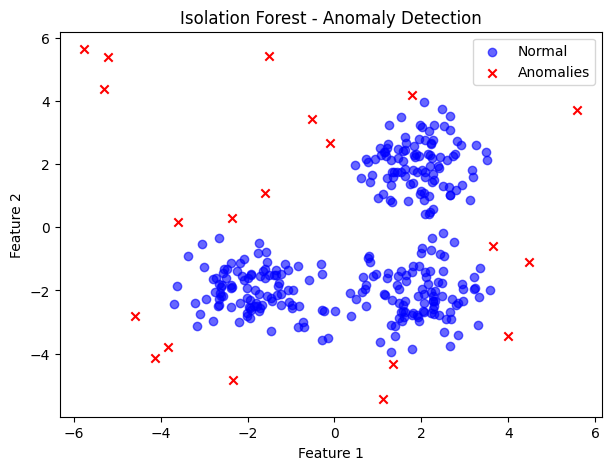

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies', marker='x')
plt.title("Isolation Forest - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
print("Normal points:", len(normal))
print("Anomalies detected:", len(anomalies))

Normal points: 300
Anomalies detected: 20
